# Aircraft Risk Analysis

## Business Understanding

To successfully expand in the area of aviation for both commercial and private uses, the company must mitigate potential risks of aircrafts. In doing so the company can make strategic and informative decisions on what to apply their attention to in order to have a successful practice in aviation, but more importantly keep our clients safe.

## Data Understanding

A dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. Every aircraft in the data has an ID number to reference and includes information such as Make, Model, weather, purpose of flight and severity of injuries as an outcome.

## Data Preparation

My approach to the dataset is to focus on the make and models of airplanes and compare them on how many fatal injuries there are in each model.

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [192]:
# Creating a copy of df to work with
df_copy = df.copy()

In [193]:
# Select rows with "Airplane" in 'Aircraft Category' column
df_copy = df_copy.loc[df_copy['Aircraft.Category'] == 'Airplane']

# Cleaning 'Total.Fatal.Injuries' column name
df_copy.rename(columns={'Total.Fatal.Injuries': 'Total Fatal Injuries'}, inplace=True)

# Dropping Nans in 'Total Fatal Injuries'
mask = ~df_copy['Total Fatal Injuries'].isna()
df_copy = df_copy.loc[mask]


# Create a new DataFrame with selected columns
new_df = df_copy[['Make', 'Model', 'Total Fatal Injuries']].copy()

In [194]:
new_df.head()

,Make,Model,Total Fatal Injuries
7,Cessna,140,0.0
8,Cessna,401B,0.0
12,Bellanca,17-30A,0.0
13,Cessna,R172K,1.0
14,Navion,A,1.0


In [195]:
# Checking values in the 'Make' column
new_df['Make'].value_counts()

CESSNA              4867
PIPER               2805
Cessna              2454
Piper               1388
BOEING              1037
                    ... 
Yowell                 1
WEAVER DAVID A         1
GROB AIRCRAFT AG       1
Rick Campbell          1
SUTPHIN                1
Name: Make, Length: 3487, dtype: int64

In [196]:
# Apply name changes using .replace and assign the result back to 'Make' column
name_changes = {'CESSNA': 'Cessna', 'PIPER': 'Piper', 'BEECH': 'Beech','CIRRUS DESIGN CORP':'Cirrus Design Corp',
 'BOEING': 'Boeing','MOONEY': 'Mooney','BELLANCA':'Bellanca','AERONCA':'Aeronca',
 'EMBRAER':'Embraer','MAULE':'Maule','AIRBUS':'Airbus','AIR TRACTOR INC':'Air Tractor', 'LUSCOMBE':'Luscombe',
 'DEHAVILLAND':'Dehavilland'}

# Applying name changes 
new_df.loc[:, 'Make'] = new_df['Make'].replace(name_changes)

In [197]:
# Checking name changes
new_df['Make'].value_counts()

Cessna                 7321
Piper                  4193
Beech                  1551
Boeing                 1197
Mooney                  363
                       ... 
SANDERSON HERBERT H       1
GILCHRIST                 1
Roger G White             1
Yowell                    1
SUTPHIN                   1
Name: Make, Length: 3473, dtype: int64

In [198]:
# Taking the first 15 values in the 'Make' Column
counts = new_df['Make'].value_counts()
new_df = new_df[new_df['Make'].isin(counts[:15].index)] 

In [199]:
new_df['Make'].value_counts()

Cessna                7321
Piper                 4193
Beech                 1551
Boeing                1197
Mooney                 363
Air Tractor            309
Bellanca               240
Airbus                 238
Cirrus Design Corp     220
Aeronca                197
Maule                  190
Embraer                146
Grumman                138
Luscombe               137
Dehavilland             92
Name: Make, dtype: int64

In [200]:
# Taking the first 15 values in the 'Model' Column
model_counts = new_df['Model'].value_counts()
new_df = new_df[new_df['Model'].isin(model_counts[:15].index)]

In [201]:
new_df['Model'].value_counts()

172          817
737          402
152          375
182          323
PA28         273
172N         243
150          238
180          205
172S         200
PA-28-140    198
172M         184
PA-18-150    165
A36          162
SR22         144
172P         124
Name: Model, dtype: int64

In [202]:
new_df.head(20)

,Make,Model,Total Fatal Injuries
17,Cessna,180,3.0
18,Cessna,172,0.0
20,Cessna,152,0.0
30,Cessna,182,0.0
48,Cessna,152,0.0
54,Cessna,172M,1.0
55,Piper,PA-28-140,1.0
57,Cessna,152,0.0
59,Cessna,152,0.0
60,Cessna,172N,0.0


In [203]:
# Grouping by Make and Model and Aggregating
filtered_df = new_df.groupby(['Make', 'Model']).agg({'Total Fatal Injuries': 'sum', 'Make': 'count'})

# Rename the 'Make' column to 'Total Accidents'
filtered_df = filtered_df.rename(columns={'Make': 'Total Accidents'})

# Reset index to make 'Make' and 'Model' columns regular columns
filtered_df = filtered_df.reset_index()

filtered_df = filtered_df[['Make', 'Model', 'Total Accidents', 'Total Fatal Injuries']]

In [204]:
filtered_df

,Make,Model,Total Accidents,Total Fatal Injuries
0,Beech,A36,162,129.0
1,Boeing,737,402,1341.0
2,Cessna,150,238,67.0
3,Cessna,152,375,67.0
4,Cessna,172,817,237.0
5,Cessna,172M,184,63.0
6,Cessna,172N,243,108.0
7,Cessna,172P,124,25.0
8,Cessna,172S,200,48.0
9,Cessna,180,205,22.0


## Exploratory Data Analysis

In [205]:
# Creating a new column 'Safety Ratio'
filtered_df['Safety Ratio'] = filtered_df['Total Fatal Injuries'] / filtered_df['Total Accidents']
filtered_df

,Make,Model,Total Accidents,Total Fatal Injuries,Safety Ratio
0,Beech,A36,162,129.0,0.796296
1,Boeing,737,402,1341.0,3.335821
2,Cessna,150,238,67.0,0.281513
3,Cessna,152,375,67.0,0.178667
4,Cessna,172,817,237.0,0.290086
5,Cessna,172M,184,63.0,0.342391
6,Cessna,172N,243,108.0,0.444444
7,Cessna,172P,124,25.0,0.201613
8,Cessna,172S,200,48.0,0.240000
9,Cessna,180,205,22.0,0.107317


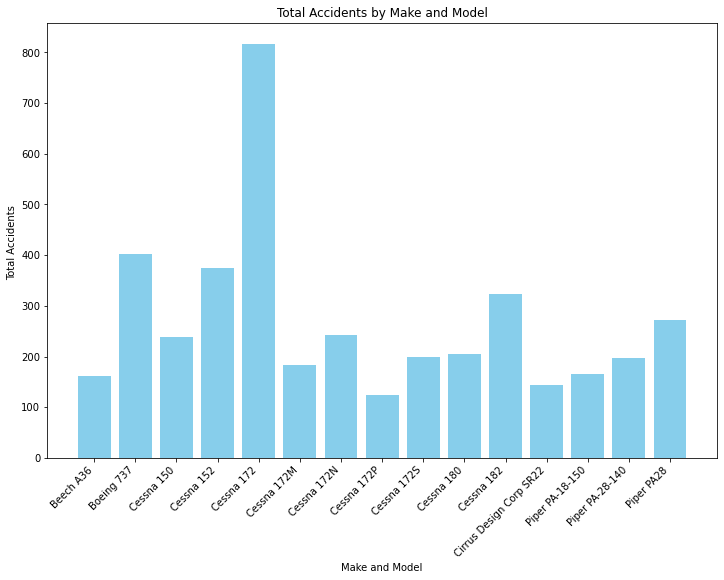

In [206]:
# Bar chart for 'Total Accidents by Make and Model'

plt.figure(figsize=(12, 8))
plt.bar(filtered_df['Make'] + ' ' + filtered_df['Model'], filtered_df['Total Accidents'], color='skyblue')
plt.xlabel('Make and Model')
plt.ylabel('Total Accidents ')
plt.title('Total Accidents by Make and Model')
plt.xticks(rotation=45, ha='right');

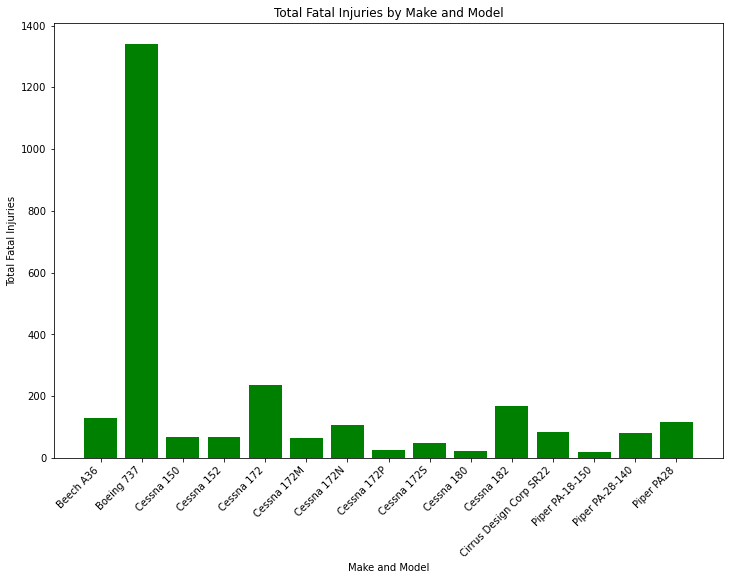

In [207]:
# Bar chart for 'Total Fatal Injuries by Make and Model'

plt.figure(figsize=(12, 8))
plt.bar(filtered_df['Make'] + ' ' + filtered_df['Model'], filtered_df['Total Fatal Injuries'], color='green')
plt.xlabel('Make and Model')
plt.ylabel('Total Fatal Injuries')
plt.title('Total Fatal Injuries by Make and Model')
plt.xticks(rotation=45, ha='right');

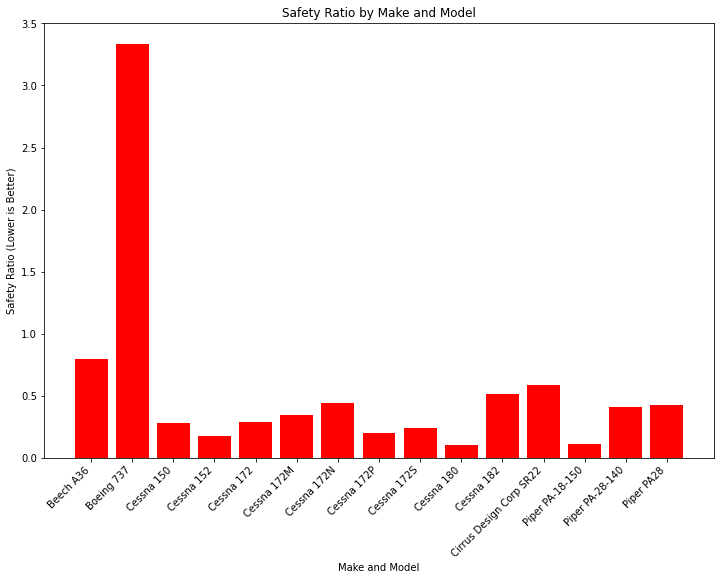

In [208]:
# Bar chart for 'Safety Ratio by Make and Model'

plt.figure(figsize=(12, 8))
plt.bar(filtered_df['Make'] + ' ' + filtered_df['Model'], filtered_df['Safety Ratio'], color='red')
plt.xlabel('Make and Model')
plt.ylabel('Safety Ratio (Lower is Better)')
plt.title('Safety Ratio by Make and Model')
plt.xticks(rotation=45, ha='right');

In [209]:
sorted_df = filtered_df.sort_values(by='Safety Ratio')
top_three_safest = sorted_df.head(3)
top_three_safest

,Make,Model,Total Accidents,Total Fatal Injuries,Safety Ratio
9,Cessna,180,205,22.0,0.107317
12,Piper,PA-18-150,165,18.0,0.109091
3,Cessna,152,375,67.0,0.178667


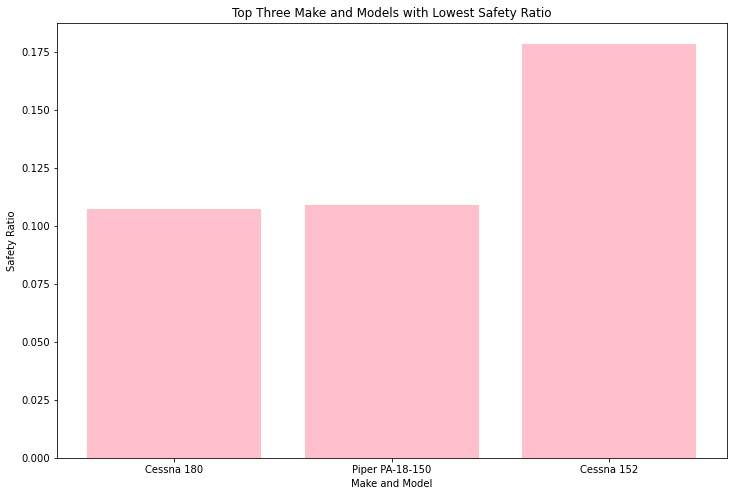

In [210]:
plt.figure(figsize=(12, 8))
plt.bar(top_three_safest['Make'] + ' ' + top_three_safest['Model'], top_three_safest['Safety Ratio'], color='pink')
plt.xlabel('Make and Model')
plt.ylabel('Safety Ratio')
plt.title('Top Three Make and Models with Lowest Safety Ratio');

## Conclusion

After conducting an analysis on the total fatal injuries associated with the Make and Model of aircraft, the study has identified three specific Makes and Models with the least risk of fatalities:

1: Cessna 180

2: Piper PA-18-150

3: Cessna 152

## Limitations

A limitation of the data is that the correlation between the model of aircraft and total fatal injury does not imply causation.

## Next Steps

Deeper exploration in the dataset may include more information to lower risks even more. 
Areas for futher exploration include; geographical Impact, weather impact, and purpose of flight.
An analysis of each area could show a higher or lower likelihood of accidents or sustained injuries.